<a href="https://colab.research.google.com/github/NBK-code/Demonstrations/blob/main/Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction

We will look at three main types of more advanced feature importance; they are:

1. Feature importance from model coefficients.
2. Feature importance from decision trees.
3. Feature importance from permutation testing.

In [1]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

1.0.2


##Create Dataset
###Classification Dataset

We will use the make_classification() function to create a test binary classification dataset. The dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five will be redundant.

In [9]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


###Regression Dataset
We will use the make_regression() function to create a test regression dataset. Like the classification dataset, the regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

In [10]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


##Coefficients as Feature Importance
###Linear Regression Feature Importance
The coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


Feature: 0, Score: -0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


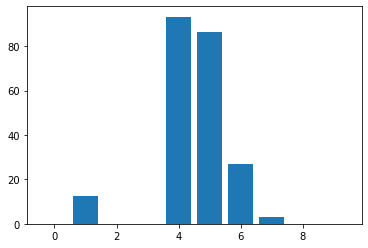

In [11]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###Logistic Regression Feature Importance
Again assumes the features are appropriately scaled.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


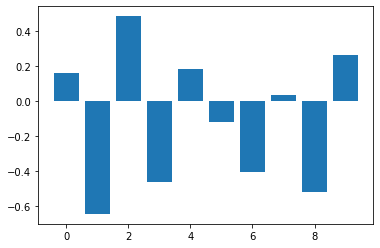

In [12]:
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

##XGBoost Feature Importance
###XGBoost Regression Feature Importance



In [13]:
# check xgboost version
import xgboost
print(xgboost.__version__)

0.90


[04:16:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.00060
Feature: 1, Score: 0.01917
Feature: 2, Score: 0.00091
Feature: 3, Score: 0.00118
Feature: 4, Score: 0.49380
Feature: 5, Score: 0.42342
Feature: 6, Score: 0.05057
Feature: 7, Score: 0.00419
Feature: 8, Score: 0.00124
Feature: 9, Score: 0.00491


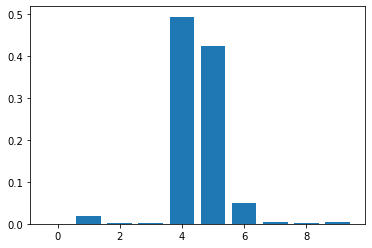

In [14]:
# xgboost for feature importance on a regression problem
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

###XGBoost Classification Feature Importance


Feature: 0, Score: 0.02464
Feature: 1, Score: 0.08153
Feature: 2, Score: 0.12516
Feature: 3, Score: 0.28400
Feature: 4, Score: 0.12694
Feature: 5, Score: 0.10752
Feature: 6, Score: 0.08624
Feature: 7, Score: 0.04820
Feature: 8, Score: 0.09357
Feature: 9, Score: 0.02220


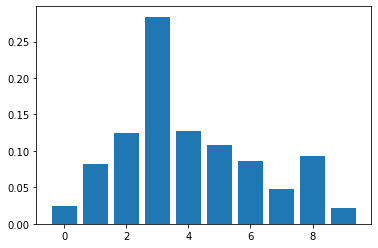

In [15]:

# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()